In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [9]:
hr = pd.read_csv('../../Datasets/cases/Human_Resources_Analytics/HR_comma_sep.csv')
dum_hr = pd.get_dummies(hr, drop_first=True)
X = dum_hr.drop('left' ,axis=1)
y = dum_hr['left']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=25, stratify=y)
dum_hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14990,0.40,0.57,2,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14991,0.37,0.48,2,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14992,0.37,0.53,2,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14993,0.11,0.96,6,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [10]:
scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append([i,accuracy_score(y_test,y_pred)])


scores = pd.DataFrame(scores, columns=['Neighbors', 'Accuracy'])
scores


,Neighbors,Accuracy
0,1,0.951100
1,2,0.946655
2,3,0.937542
3,4,0.941543
4,5,0.937319
5,6,0.942654
6,7,0.937986
7,8,0.942209
8,9,0.939542
9,10,0.941320


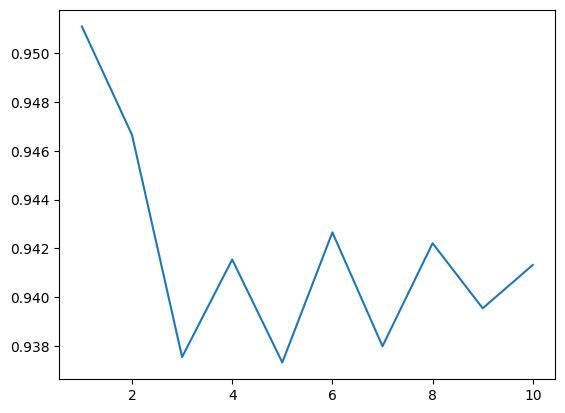

In [11]:
plt.plot(scores['Neighbors'], scores['Accuracy'])

In [18]:
scaler = StandardScaler()
xx = scaler.fit_transform(X_train)
xxtest = scaler.transform(X_test)

scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xx,y_train)
    y_pred = knn.predict(xxtest)
    scores.append([i,accuracy_score(y_test,y_pred)])
scores = pd.DataFrame(scores, columns=['Neighbors', 'Accuracy'])
scores

,Neighbors,Accuracy
0,1,0.966659
1,2,0.963325
2,3,0.950656
3,4,0.948433
4,5,0.940209
5,6,0.946210
6,7,0.942209
7,8,0.944210
8,9,0.940876
9,10,0.941543


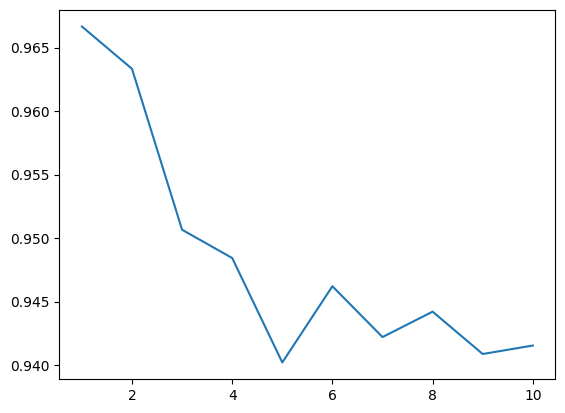

In [19]:
plt.plot(scores['Neighbors'], scores['Accuracy'])

WE DID FIT_TRANSFORM ON ONLY TRAINING X AND THEN ONLY TRANFORM ON XTEST. WE DO NOT PERFORM IT ON Y I.E. DEPENDENT.(USUALLY)

HERE(STANDARD SCALER NOT ALGO'S) FIT MEANS FINDING MEAN AND STD THAT IT USES FOR TRANSFORMING TRAINING DATA 

AND IN TEST WE DO NOT CALCULATE MEAN AND STD AND WE USE THE STD MEAN FROM THE TRAINING DATA HENCE WE DID NOT FIT THE TEST-X

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
xm = scaler.fit_transform(X_train)
xmm = scaler.transform(X_test)

scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xm,y_train)
    y_pred = knn.predict(xmm)
    scores.append([i,accuracy_score(y_test,y_pred)])
scores = pd.DataFrame(scores, columns=['Neighbors', 'Accuracy'])
scores.sort_values(by='Accuracy', ascending=False)

,Neighbors,Accuracy
0,1,0.966215
1,2,0.962658
2,3,0.951100
3,4,0.945543
5,6,0.943321
7,8,0.942432
6,7,0.940209
9,10,0.939987
4,5,0.939764
8,9,0.938875
